In [1]:
import pandas as pd
import sqlite3
import seaborn as sns

# Establish connection to sqlite db
cnx = sqlite3.connect('bank_churners.db')
customer_churn_df = pd.read_sql_query('SELECT * FROM bank_churners', cnx)

In [2]:
# Check column names
customer_churn_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [3]:
# Check datatypes
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
# Check for missing values
customer_churn_df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
# Drop unnecessary columns
customer_churn_df = customer_churn_df.drop(columns= ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
print(customer_churn_df.head())
print(customer_churn_df.shape)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  708082083  Existing Customer            45      F                3   
1  708083283  Attrited Customer            58      M                0   
2  708084558  Attrited Customer            46      M                3   
3  708085458  Existing Customer            34      F                2   
4  708086958  Existing Customer            49      F                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married  Less than $40K          Blue   
1         Unknown         Single     $40K - $60K          Blue   
2       Doctorate       Divorced    $80K - $120K          Blue   
3      Uneducated         Single  Less than $40K          Blue   
4      Uneducated        Married         Unknown          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              36  ...                       3                      3   
1              45 

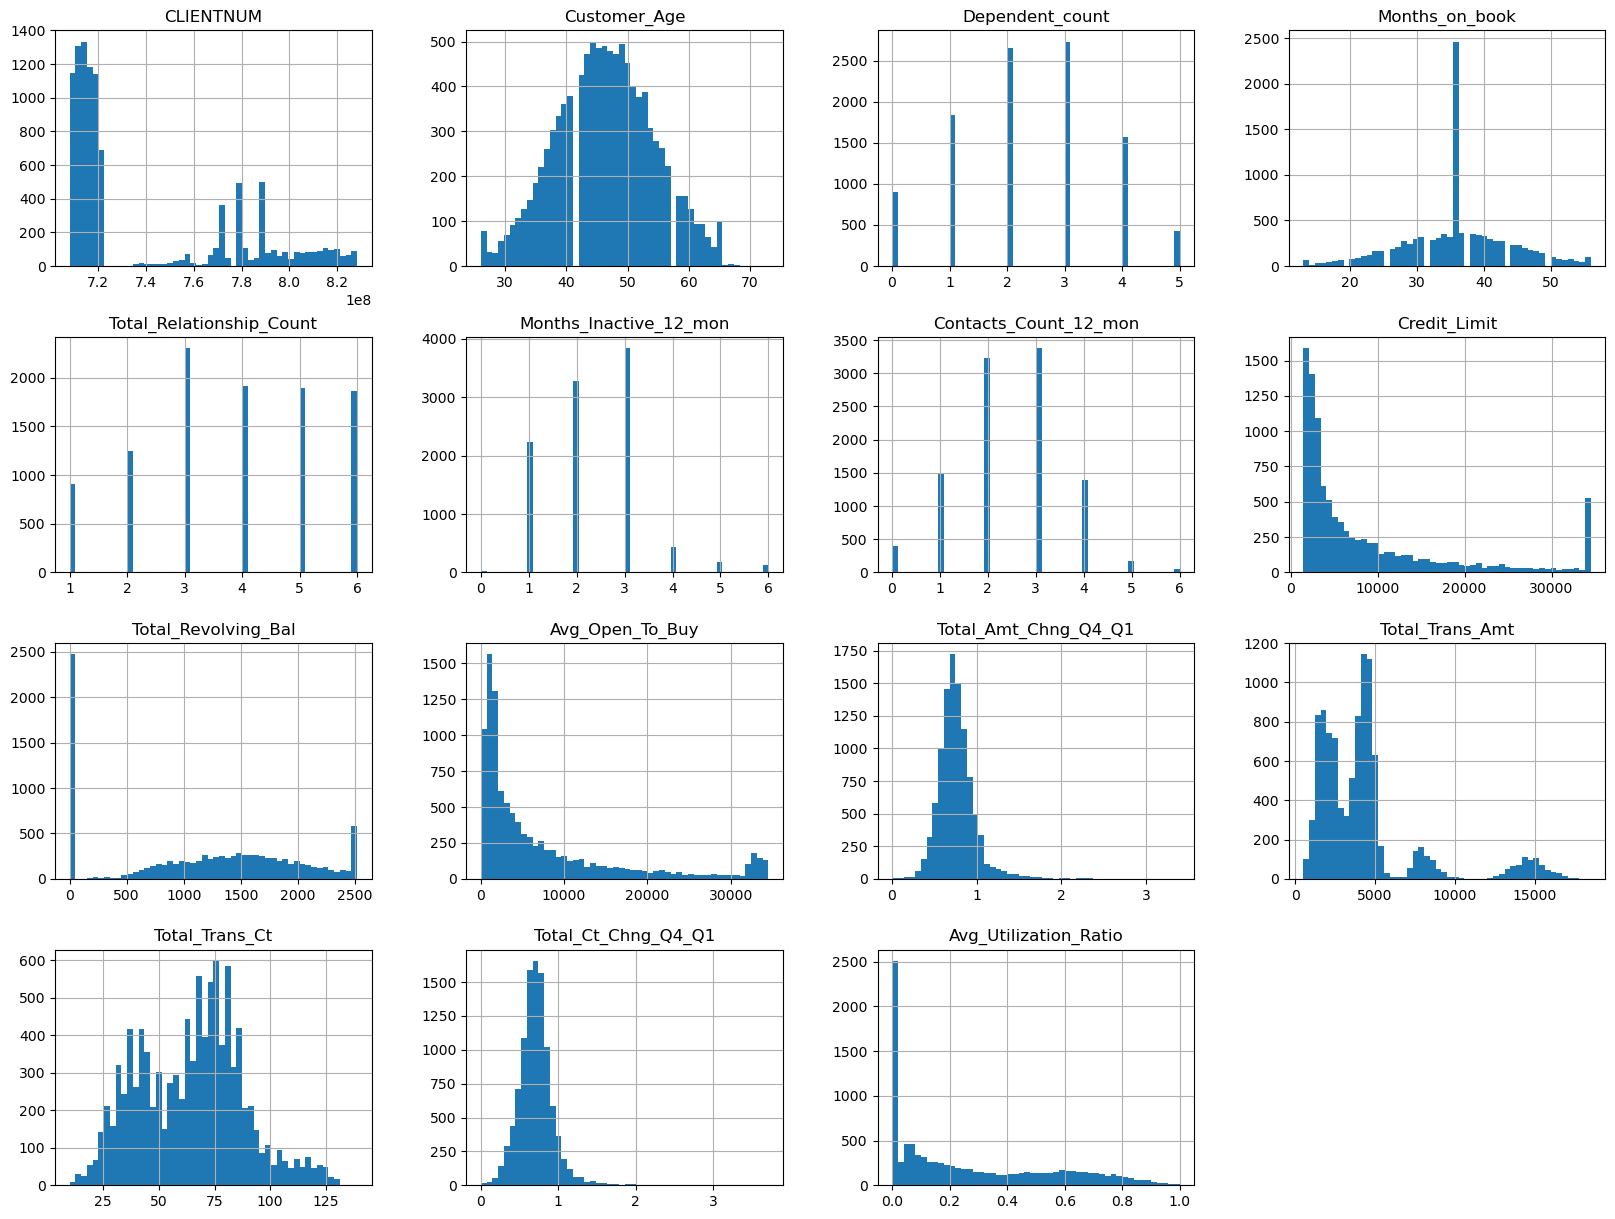

In [6]:
import matplotlib.pyplot as plt

# Plot histograms of numeric columns
customer_churn_df.hist(bins=50, figsize=(20,15))
plt.show()


In [7]:
from scipy import stats
import numpy as np

# Remove outliers using z-score
# Create df with only numeric columns
numeric_cols = customer_churn_df.select_dtypes(include=[np.number]).columns

# Calculate z-score (absolute value)
z_scores = stats.zscore(customer_churn_df[numeric_cols])
abs_z_scores = np.abs(z_scores)

# New df including values with a z-score < 3
filtered_entries = (abs_z_scores < 3).all(axis=1)
customer_churn_df = customer_churn_df[filtered_entries]

# Review filtered df
print(customer_churn_df.head())
print(customer_churn_df.shape)

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
1  708083283  Attrited Customer            58      M                0   
3  708085458  Existing Customer            34      F                2   
4  708086958  Existing Customer            49      F                2   
5  708095133  Existing Customer            43      M                4   
7  708099183  Existing Customer            37      F                2   

  Education_Level Marital_Status Income_Category Card_Category  \
1         Unknown         Single     $40K - $60K          Blue   
3      Uneducated         Single  Less than $40K          Blue   
4      Uneducated        Married         Unknown          Blue   
5         Unknown        Unknown         $120K +          Blue   
7     High School         Single  Less than $40K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1              45  ...                       1                      3   
3              24 

In [8]:
# Seperate features from the target variable
y = customer_churn_df['Attrition_Flag']
X = customer_churn_df.drop(columns= ['Attrition_Flag'])

In [9]:
# Preview features data
X.head(3)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,708083283,58,M,0,Unknown,Single,$40K - $60K,Blue,45,3,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
3,708085458,34,F,2,Uneducated,Single,Less than $40K,Blue,24,6,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,708086958,49,F,2,Uneducated,Married,Unknown,Blue,41,3,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239


In [10]:
# Preview the first five entries for the target variable
y[:5]

1    Attrited Customer
3    Existing Customer
4    Existing Customer
5    Existing Customer
7    Existing Customer
Name: Attrition_Flag, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for feature in categorical_features:
    X[feature] = le.fit_transform(X[feature])

In [12]:
# Review the features data
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
1,708083283,58,1,0,6,2,1,0,45,3,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
3,708085458,34,0,2,5,2,4,0,24,6,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,708086958,49,0,2,5,1,5,0,41,3,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239
5,708095133,43,1,4,6,3,0,0,34,5,2,2,33304.0,1833,31471.0,0.428,1448,29,0.381,0.055
7,708099183,37,0,2,3,2,4,0,36,4,2,2,5723.0,1873,3850.0,0.851,2732,63,0.853,0.327


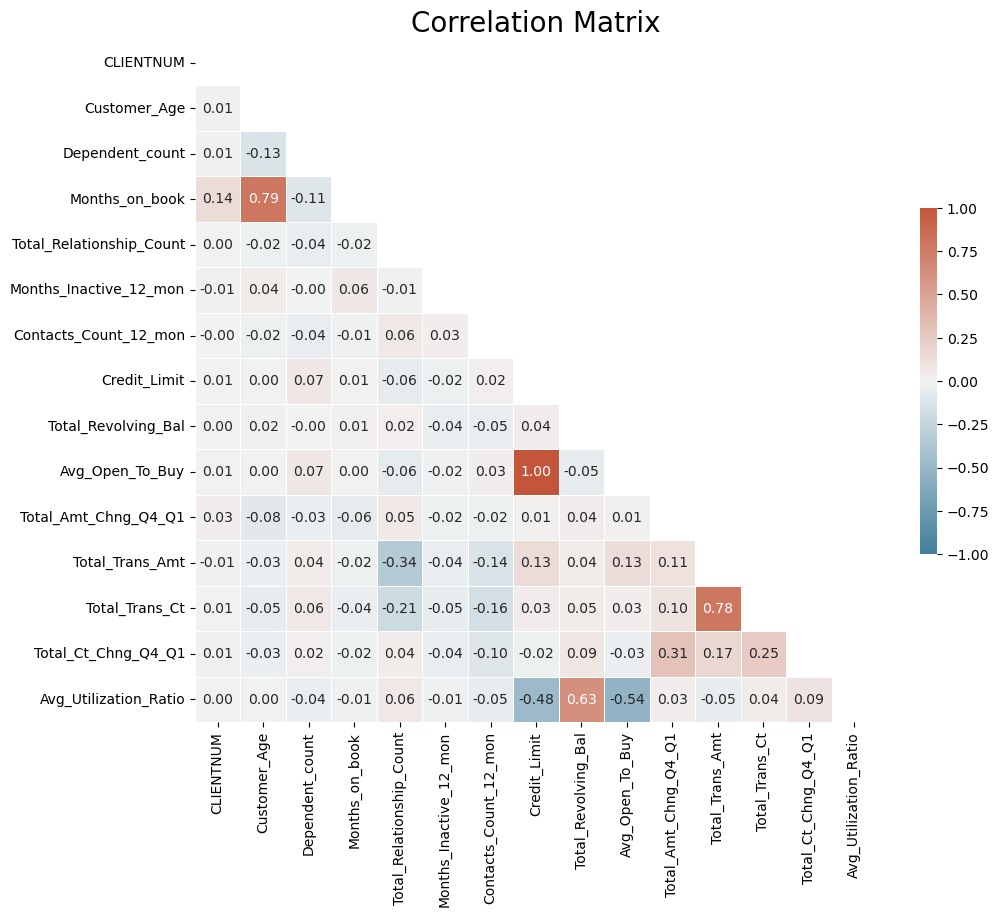

In [13]:
import seaborn as sns

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
corr = customer_churn_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=500, random_state=78)
rf.fit(X_train_scaled, y_train)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [18]:
# Predict the test set results
y_pred_knn = knn.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_lr = lr.predict(X_test_scaled)


# KNN analysis

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Classification report for KNN model
print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

# Calculating the accuracy score
knn_acc_score = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy Score: {knn_acc_score}')


KNN Classification Report
                   precision    recall  f1-score   support

Attrited Customer       0.78      0.53      0.63       309
Existing Customer       0.91      0.97      0.94      1554

         accuracy                           0.90      1863
        macro avg       0.85      0.75      0.78      1863
     weighted avg       0.89      0.90      0.89      1863

Accuracy Score: 0.8969404186795491


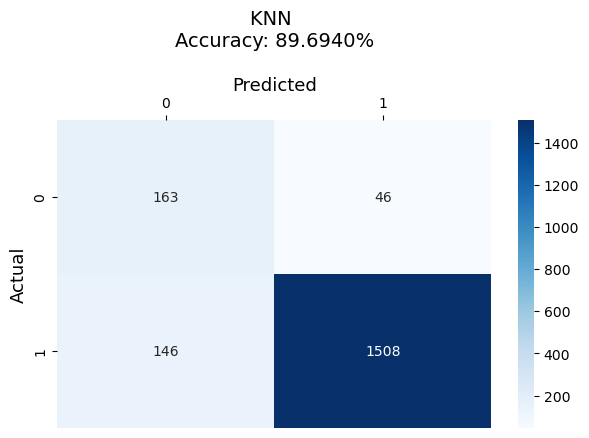

In [59]:
import matplotlib.pyplot as plt

# Create confusion matrix for KNN model
knn_cm = confusion_matrix(y_pred_knn, y_test)

# Confusion matrix vizualization
f, ax = plt.subplots(figsize= (7, 4))
sns.heatmap(knn_cm, annot=True, fmt='g', 
            cmap='Blues')
ax.set_title(f'KNN \nAccuracy: {knn_acc_score:.4%}\n', fontsize= 14)
ax.set_ylabel('Actual', fontsize= 13)
ax.set_xlabel('Predicted', fontsize= 13)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# Random Forest analysis

In [61]:
# Classification report for random forest
print("Random Classification Report")
print(classification_report(y_test, y_pred_rf))

# Calculate the accuracy score
rf_acc_score = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy Score: {rf_acc_score}')

Random Classification Report
                   precision    recall  f1-score   support

Attrited Customer       0.94      0.83      0.89       309
Existing Customer       0.97      0.99      0.98      1554

         accuracy                           0.96      1863
        macro avg       0.95      0.91      0.93      1863
     weighted avg       0.96      0.96      0.96      1863

Accuracy Score: 0.9640365002683843


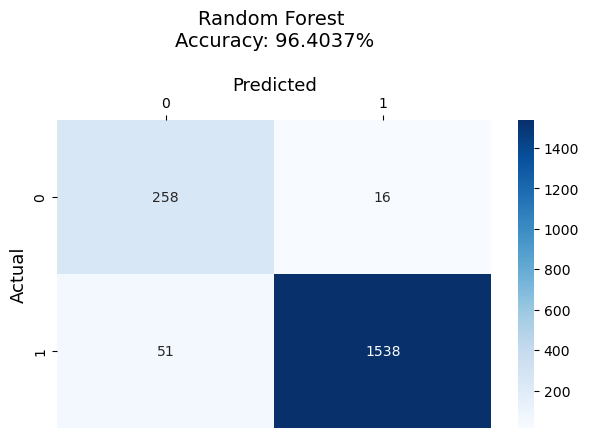

In [62]:
# Create confusion matrix for random forest
rf_cm = confusion_matrix(y_pred_rf, y_test)

# Confusion matrix vizualization
f, ax = plt.subplots(figsize= (7, 4))
sns.heatmap(rf_cm, annot=True, fmt='g', 
            cmap='Blues')
ax.set_title(f'Random Forest \nAccuracy: {rf_acc_score:.4%}\n', fontsize= 14)
ax.set_ylabel('Actual', fontsize= 13)
ax.set_xlabel('Predicted', fontsize= 13)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# Logistic Regression analysis

In [63]:
# Classification report for logistic regression model
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

# Calculate the accuracy score
lr_acc_score = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy Score: {lr_acc_score}')

Logistic Regression Classification Report
                   precision    recall  f1-score   support

Attrited Customer       0.76      0.57      0.65       309
Existing Customer       0.92      0.96      0.94      1554

         accuracy                           0.90      1863
        macro avg       0.84      0.77      0.80      1863
     weighted avg       0.89      0.90      0.89      1863

Accuracy Score: 0.8985507246376812


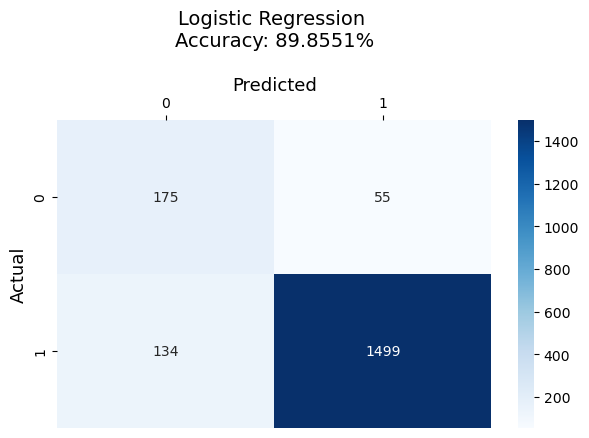

In [64]:
# Create confusion matrix for logistic regression model
lr_cm = confusion_matrix(y_pred_lr, y_test)

# Confusion matrix vizualization
f, ax = plt.subplots(figsize= (7, 4))
sns.heatmap(lr_cm, annot=True, fmt='g', 
            cmap='Blues')
ax.set_title(f'Logistic Regression \nAccuracy: {lr_acc_score:.4%}\n', fontsize= 14)
ax.set_ylabel('Actual', fontsize= 13)
ax.set_xlabel('Predicted', fontsize= 13)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

In [ ]:
# from sklearn.dummy import DummyClassifier

# # Supress warnings for zero-division
# import warnings
# warnings.filterwarnings('ignore')

# # Creating a dummy classifier
# dummy = DummyClassifier(strategy='most_frequent')

# # Training the dummy classifier
# dummy.fit(X_train, y_train)

# # Getting a classification report
# y_pred_dummy = dummy.predict(X_test)
# print("Dummy Classifier Classification Report")
# print(classification_report(y_test, y_pred_dummy))

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter values that should be searched
# k_range = list(range(1, 31))

# # Create a parameter grid: map the parameter names to the values that should be searched
# param_grid = dict(n_neighbors=k_range)

# # Instantiate the grid
# grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# # Fit the grid with data
# grid.fit(X, y)

# # View the complete results
# grid.cv_results_


In [ ]:
# feature_importances = dtc.feature_importances_
# print("Feature importances:\n", feature_importances)


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20,10))  
# _ = plot_tree(dtc, 
#               feature_names=X.columns,
#               class_names=['Existing Customer', 'Attrited Customer'],
#               filled=True)


In [ ]:
# from sklearn.model_selection import cross_val_score

# # Perform 5-fold cross validation
# scores = cross_val_score(dtc, X_train_scaled, y_train, cv=5)
# print("Cross-validation scores: ", scores)
# print("Average cross-validation score: ", scores.mean())


In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Compute predicted probabilities: y_pred_prob
# y_pred_prob = dtc.predict_proba(X_test_scaled)[:,1]

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # Plot ROC curve
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# # Compute and print AUC score
# print("AUC: ", roc_auc_score(y_test, y_pred_prob))
